In [7]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [12]:
def get(thing, maxsv,seed):
    return np.load("data/{0}_maxsv={1}_seed={2}.npy".format(thing,maxsv,seed))

In [10]:
with open("data/metadata.json") as f:
    metadata=json.load(f)
numseed=metadata['numseed']
numD = metadata['numD']
Dvals = list(range(2,20,2))
assert numD==len(Dvals)

In [58]:
fidelities = np.empty((numD, numseed),dtype=object)
final_fidelities = np.empty((numD, numseed))

bond_dims = np.empty((numD, numseed),dtype=object)
final_bond_dims = np.empty((numD, numseed))

In [59]:
for ii in range(numD):
    for jj in range(numseed):
        fidelities[ii,jj] = get("fidelity", Dvals[ii],jj )
        final_fidelities[ii,jj] = fidelities[ii,jj][-1]
        
        bond_dims[ii,jj]= get("max_bond_dim", Dvals[ii], jj)
        final_bond_dims[ii,jj] = bond_dims[ii,jj][-1]

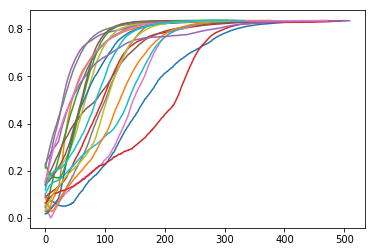

In [62]:
fig, ax = plt.subplots()
for jj in range(numseed):
    plt.plot(fidelities[0, jj])

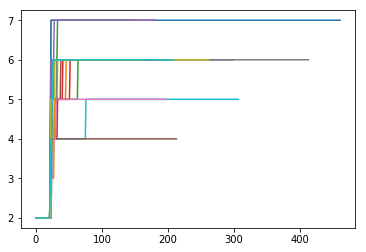

In [64]:
fig, ax = plt.subplots()
for jj in range(numseed):
    plt.plot(bond_dims[-1, jj])

In [60]:
fidelity_mean = np.mean(final_fidelities, axis=1)
fidelity_err = np.std(final_fidelities,axis=1) / np.sqrt(numseed)

bond_dim_mean = np.mean(final_bond_dims, axis=1)
bond_dim_err = np.std(final_bond_dims,axis=1) / np.sqrt(numseed)

<Container object of 3 artists>

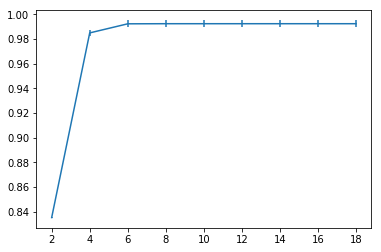

In [56]:
fig, ax = plt.subplots()
plt.errorbar(Dvals, fidelity_mean, yerr=fidelity_err)

<Container object of 3 artists>

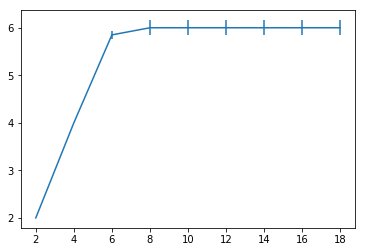

In [61]:
fig, ax = plt.subplots()
plt.errorbar(Dvals, bond_dim_mean, yerr=bond_dim_err)